# Exploring data distribution

In this simple notebook we perform a basic exploration in order to clean data and observe the class distribution over the patients to make a reasonable splits of the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip -d /content/training_set

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip
  inflating: /content/training_set/S001_128.mat  
  inflating: /content/training_set/S001_128_ann.mat  
  inflating: /content/training_set/S001_128_rpk.mat  
  inflating: /content/training_set/S002_128.mat  
  inflating: /content/training_set/S002_128_ann.mat  
 extracting: /content/training_set/S002_128_rpk.mat  
  inflating: /content/training_set/S003_128.mat  
  inflating: /content/training_set/S003_128_ann.mat  
  inflating: /content/training_set/S003_128_rpk.mat  
  inflating: /content/training_set/S004_128.mat  
  inflating: /content/training_set/S004_128_ann.mat  
 extracting: /content/training_set/S004_128_rpk.mat  
  inflating: /content/training_set/S005_128.mat  
  inflating: /content/training_set/S005_128_ann.mat  
  inflating: /content/training_set/S005_128_rpk.mat  
  inflating: /content/training_set/S006_128.mat  
  inflating: /content/training_set/S006_128_ann.mat  
  inflating: /co

In [3]:
input_dir = "/content/training_set"

In [4]:
import os

# list the data present in the dataset
dirs = sorted(os.listdir(input_dir))

In [5]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd
import random
import tensorflow as tf

#Setting random seed for reproducibility
#Remember to use always SEED for the functions that requires it (like Scikit models)
SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [6]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

In [7]:
# Get the ecg file for each sample and create a list of all ecgs
ecg_files = []

for f in dirs:
  g = input_dir+'/'+f
  if g.find('_ann') == -1 and g.find('_rpk') == -1:
   ecg_files.append(g)

num_files = len(ecg_files)
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames = list()
ecgs = list()
rpks = list()
anns = list()

for i in range(num_files):
  ecg, rpk, ann = load_data(ecg_files[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, num_files),
        end=""
    )
  ecgs.append(ecg)
  rpks.append(rpk)
  anns.append(ann)
  filenames.append(ecg_files[i])

Loading file: 105/105

Plotting 10 ecgs from the dataset in order to see their variability

9


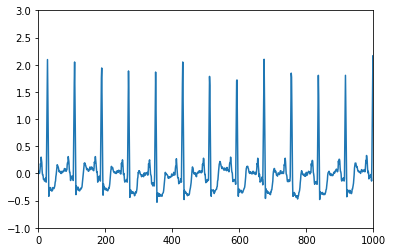

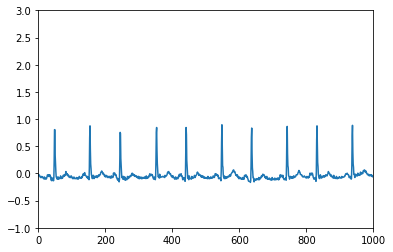

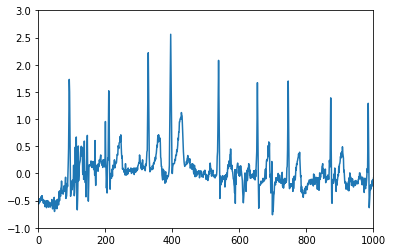

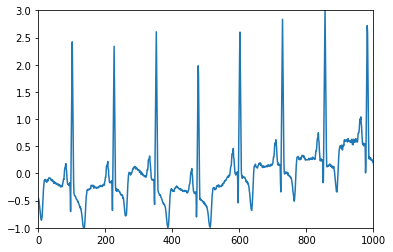

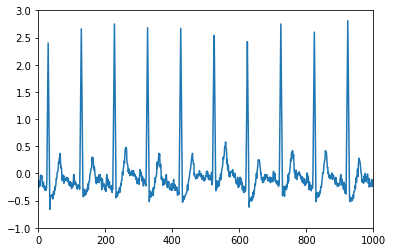

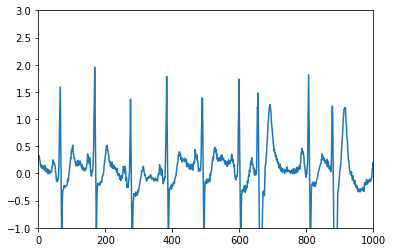

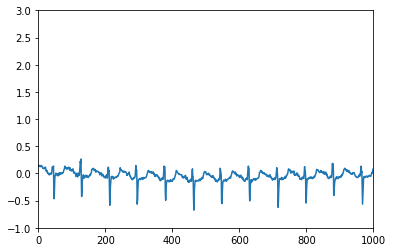

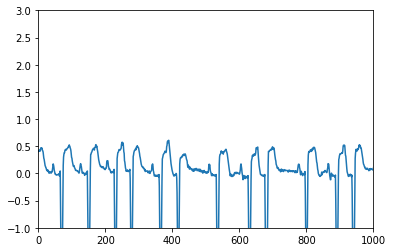

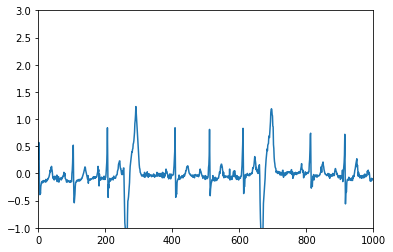

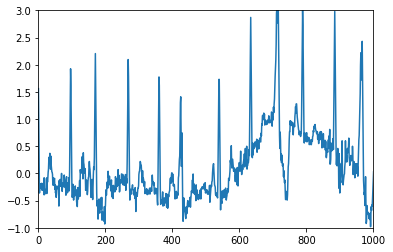

In [8]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.figure()
  plt.plot(ecgs[i]['ecg'][:,0])
  plt.xlim(0,1000)
  plt.ylim(-1,3)
print(i)

Calculate the percentage of type of beats for each patient

In [9]:
import collections
perc = []
for i in range(len(anns)):
  c = collections.Counter(anns[i]['labels'])
  perc.append([filenames[i].split('/')[-1], (c['N'] / len(anns[i]['labels'])), (c['S'] / len(anns[i]['labels'])), (c['V'] / len(anns[i]['labels']))])


In [10]:
import collections
beats_n = []
for i in range(len(anns)):
  c = collections.Counter(anns[i]['labels'])
  beats_n.append([filenames[i].split('/')[-1], c['N'], c['S'], c['V']])


In [11]:
beats_n = pd.DataFrame(beats_n, columns = ['filename','N', 'S', 'V'])

In [12]:
perc = pd.DataFrame(perc, columns = ['filename','N', 'S', 'V'])

In [13]:
perc.head(5)

,filename,N,S,V
0,S001_128.mat,0.985970,0.004209,0.009821
1,S002_128.mat,0.731906,0.267666,0.000428
2,S003_128.mat,0.768437,0.203713,0.027849
3,S004_128.mat,0.984216,0.011274,0.004510
4,S005_128.mat,0.985067,0.014933,0.000000


In [14]:
perc.describe()

,N,S,V
count,105.000000,105.000000,105.000000
mean,0.932110,0.037366,0.030524
std,0.093564,0.064813,0.057009
min,0.586390,0.000000,0.000000
25%,0.920068,0.000000,0.000000
50%,0.969936,0.007600,0.002223
75%,0.998763,0.040650,0.037355
max,1.000000,0.292457,0.300662


Find patients with all N beats and remove them

In [15]:
perc.loc[perc['N'] == 1]

,filename,N,S,V
66,S080_250.mat,1.0,0.0,0.0
67,S081_250.mat,1.0,0.0,0.0
71,S085_250.mat,1.0,0.0,0.0
72,S086_250.mat,1.0,0.0,0.0
74,S088_250.mat,1.0,0.0,0.0
75,S089_250.mat,1.0,0.0,0.0
76,S090_250.mat,1.0,0.0,0.0
77,S091_250.mat,1.0,0.0,0.0
85,S099_250.mat,1.0,0.0,0.0
86,S100_250.mat,1.0,0.0,0.0


In [16]:
cleaned = perc.loc[perc['N'] < 1]

In [17]:
cleaned.describe()

,N,S,V
count,91.000000,91.000000,91.000000
mean,0.921666,0.043115,0.035220
std,0.096378,0.067849,0.059902
min,0.586390,0.000000,0.000000
25%,0.900202,0.000823,0.000450
50%,0.955975,0.011898,0.004454
75%,0.991409,0.054514,0.042521
max,0.999601,0.292457,0.300662


In [18]:
total_l = 0
for i in range(len(anns)):
  total_l = total_l + len(anns[i]['labels'])

print(total_l)

244336


calculate the percentage of the contribution of the single patient on the whole percentage of the single types of beats

In [19]:
import collections
perc_a = []
for i in range(len(anns)):
  c = collections.Counter(anns[i]['labels'])
  perc_a.append([filenames[i].split('/')[-1], (c['N'] / total_l), (c['S'] / total_l), (c['V'] / total_l)])


In [20]:
perc_a = pd.DataFrame(perc_a, columns = ['filename','N', 'S', 'V'])

In this example it is possible to see that the patient 0 have about 1,5% of beats of type N

In [21]:
perc_a.head(5)

,filename,N,S,V
0,S001_128.mat,0.011505,0.000049,0.000115
1,S002_128.mat,0.006994,0.002558,0.000004
2,S003_128.mat,0.006098,0.001617,0.000221
3,S004_128.mat,0.007146,0.000082,0.000033
4,S005_128.mat,0.007829,0.000119,0.000000


In [24]:
perc_a_cleaned = perc_a

In [25]:
perc_a_cleaned.describe()

,N,S,V
count,105.000000,105.000000,105.000000
mean,0.008845,0.000375,0.000304
std,0.002106,0.000657,0.000584
min,0.002419,0.000000,0.000000
25%,0.007527,0.000000,0.000000
50%,0.008656,0.000070,0.000020
75%,0.010003,0.000426,0.000303
max,0.017296,0.002587,0.002975


In [ ]:
beats_n = beats_n.loc[perc_a_cleaned.index.values]

In [ ]:
beats_n = beats_n.reset_index(drop = True)

In [ ]:
perc_a_cleaned = perc_a_cleaned.reset_index(drop = True)

In [ ]:
beats_n

,filename,N,S,V
0,S001_128.mat,2811,12,28
1,S002_128.mat,1709,625,1
2,S003_128.mat,1490,395,54
3,S004_128.mat,1746,20,8
4,S005_128.mat,1913,29,0
...,...,...,...,...
86,S114_250.mat,1872,0,1
87,S115_250.mat,2489,1,97
88,S116_250.mat,1874,1,4
89,S117_250.mat,1886,281,0


Shuffling the dataset before trying to extract a split

In [ ]:
all = perc_a_cleaned.sample(frac = 1)

In [ ]:
test = all[15 : 26]
train = all[~all.index.isin(test.index)]

In [ ]:
test = beats_n.loc[test.index.values]
train = beats_n.loc[train.index.values]

In [ ]:
set(train['filename'].values) - set(test['filename'].values) == set(train['filename'].values)

True

In [ ]:
len(test) + len(train), len(perc_a_cleaned)

(91, 91)

In [ ]:
test[['N', 'S', 'V']].values.sum()

25971

In [ ]:
test[['N', 'S', 'V']].sum(axis=0) * 100 / test[['N', 'S', 'V']].values.sum()

N    91.613723
S     4.763005
V     3.623272
dtype: float64

Text(0.5, 1.0, 'Test data distribution')

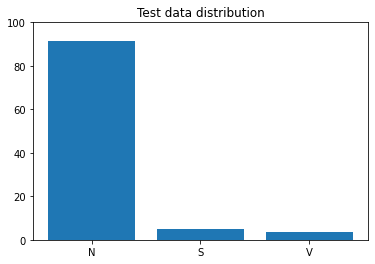

In [40]:
plt.bar(['N', 'S', 'V'],[91.613723, 4.763005, 3.623272])
plt.ylim(0,100)
plt.title("Test data distribution")

In [ ]:
test

,filename,N,S,V
37,S038_128.mat,1744,19,130
11,S012_128.mat,1327,629,307
73,S095_250.mat,2618,414,6
51,S052_128.mat,1776,12,8
48,S049_128.mat,1898,9,74
68,S084_250.mat,2285,0,62
23,S024_128.mat,1773,40,7
69,S087_250.mat,4047,0,3
39,S040_128.mat,1650,59,0
81,S105_250.mat,2189,2,0


In [ ]:
train[['N', 'S', 'V']].sum(axis = 0) * 100 / train[['N', 'S', 'V']].values.sum()

N    91.844802
S     4.484127
V     3.671071
dtype: float64

Text(0.5, 1.0, 'Development set data distribution')

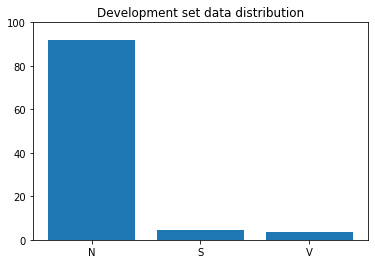

In [42]:
plt.bar(['N', 'S', 'V'],[91.844802, 4.484127, 3.671071])
plt.ylim(0,100)
plt.title("Development set data distribution")

Calculate the dimension of the training set and validation set considering that we are interested in hold-out 20% of the patients

In [ ]:
len(train) * 0.2

16.0

In [ ]:
len(train) - 16

64

In [ ]:
beats_n = beats_n.loc[train.index.values]

In [ ]:
beats_n = beats_n.reset_index(drop = True)

In [ ]:
train = train.reset_index(drop = True)

In [ ]:
develop = train

In [ ]:
develop

,filename,N,S,V
0,S116_250.mat,1874,1,4
1,S010_128.mat,1794,460,477
2,S039_128.mat,2119,48,64
3,S022_128.mat,1661,20,0
4,S097_250.mat,2407,2,4
...,...,...,...,...
75,S006_128.mat,1472,48,542
76,S117_250.mat,1886,281,0
77,S047_128.mat,1830,8,0
78,S079_250.mat,2555,0,10


In [ ]:
#12

In [ ]:
train = develop.sample(frac = 1)

In [ ]:
#win = 10

In [ ]:
set(develop['filename'].values) - set(test['filename'].values) == set(develop['filename'].values)

True

In [ ]:
valid = train.loc[train.index.values[15 : 31]]
train_s = train.loc[~train.index.isin(valid.index)]

In [ ]:
len(valid) + len(train_s), len(develop)

(80, 80)

In [ ]:
valid = beats_n.loc[valid.index.values]
train_s = beats_n.loc[train_s.index.values]

In [ ]:
set(valid['filename'].values) - set(test['filename'].values) == set(valid['filename'].values)

True

In [ ]:
valid[['N', 'S', 'V']].sum(axis=0) * 100 / valid[['N', 'S', 'V']].values.sum()

N    92.067167
S     4.711166
V     3.221667
dtype: float64

Text(0.5, 1.0, 'Validation data distribution')

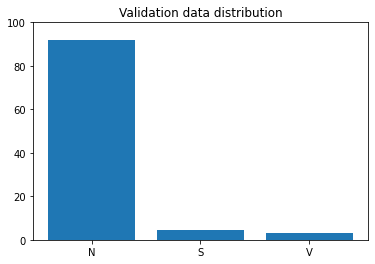

In [43]:
plt.bar(['N', 'S', 'V'],[92.067167,4.711166, 3.221667])
plt.ylim(0,100)
plt.title("Validation data distribution")

In [ ]:
train_s[['N', 'S', 'V']].sum(axis = 0) * 100 / train_s[['N', 'S', 'V']].values.sum()

N    91.791955
S     4.430170
V     3.777875
dtype: float64

Text(0.5, 1.0, 'Train data distribution')

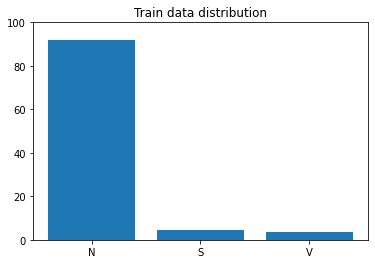

In [45]:
plt.bar(['N', 'S', 'V'],[91.791955,4.430170, 3.777875])
plt.ylim(0,100)
plt.title("Train data distribution")

## Produced Split

In [ ]:
train_s['filename'].values

array(['S043_128.mat', 'S059_128.mat', 'S117_250.mat', 'S042_128.mat',
       'S004_128.mat', 'S039_128.mat', 'S050_128.mat', 'S002_128.mat',
       'S097_250.mat', 'S003_128.mat', 'S006_128.mat', 'S047_128.mat',
       'S041_128.mat', 'S083_250.mat', 'S007_128.mat', 'S056_128.mat',
       'S102_250.mat', 'S093_250.mat', 'S022_128.mat', 'S008_128.mat',
       'S116_250.mat', 'S035_128.mat', 'S115_250.mat', 'S001_128.mat',
       'S060_128.mat', 'S026_128.mat', 'S030_128.mat', 'S063_128.mat',
       'S045_128.mat', 'S044_128.mat', 'S009_128.mat', 'S027_128.mat',
       'S061_128.mat', 'S028_128.mat', 'S079_250.mat', 'S107_250.mat',
       'S058_128.mat', 'S092_250.mat', 'S112_250.mat', 'S104_250.mat',
       'S017_128.mat', 'S082_250.mat', 'S016_128.mat', 'S064_128.mat',
       'S114_250.mat', 'S062_128.mat', 'S051_128.mat', 'S005_128.mat',
       'S108_250.mat', 'S020_128.mat', 'S054_128.mat', 'S057_128.mat',
       'S065_128.mat', 'S118_250.mat', 'S010_128.mat', 'S033_128.mat',
      

In [ ]:
valid['filename'].values

array(['S014_128.mat', 'S029_128.mat', 'S023_128.mat', 'S098_250.mat',
       'S019_128.mat', 'S094_250.mat', 'S018_128.mat', 'S055_128.mat',
       'S021_128.mat', 'S031_128.mat', 'S096_250.mat', 'S025_128.mat',
       'S053_128.mat', 'S101_250.mat', 'S036_128.mat', 'S011_128.mat'],
      dtype=object)

In [ ]:
test['filename'].values

array(['S038_128.mat', 'S012_128.mat', 'S095_250.mat', 'S052_128.mat',
       'S049_128.mat', 'S084_250.mat', 'S024_128.mat', 'S087_250.mat',
       'S040_128.mat', 'S105_250.mat', 'S037_128.mat'], dtype=object)

check that all the splits have the empty interection and correct length

In [ ]:
set(train_s['filename'].values) - set(test['filename'].values) == set(train_s['filename'].values)

True

In [ ]:
set(train_s['filename'].values) - set(valid['filename'].values) == set(train_s['filename'].values)

True

In [ ]:
set(valid['filename'].values) - set(test['filename'].values) == set(valid['filename'].values)

True

In [ ]:
len(train_s) + len(valid) + len(test)

91